In [1]:
import numpy as np
from scipy import integrate
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib notebook
import math as mt

## $m_2a = - \frac{Gm_1m_2}{r^2}$ 
## We can rewrite this as:
## * $\dot{x} = \frac{dx}{dt} = v_x$
## * $\ddot{x} = \frac{d^2x}{dt^2} = \frac{dv_x}{dt} = -\frac{GM_E}{r^{3/2}}x$

In General

## * $\vec{\dot{u}} = \vec{v}$
## * $\vec{\ddot{u}} = -\frac{GM_E}{r^{3/2}}\vec{u}$


## Complete the function below where we will treat state as a vector containing 6 elements:

## $$state = [x,y,z,v_x,v_y,v_z]$$

In [2]:
def model_2BP(t,state):
    ME = 5.98E+24
    G  = 6.67E-11 
    mu = ME*G*1E-9  # Earth's gravitational parameter = M*G  
                          # [km^3/s^2]
    x = state[0]
    y = state[1]
    z = state[2]
    
    x_dot = state[3]
    y_dot = state[4]
    z_dot = state[5]
    
    r = (x**2 + y**2 + z**2)**0.5
    x_ddot = -mu * x / (r**3)
    y_ddot = -mu * y / (r**3)
    z_ddot = -mu * z / (r**3)
    
    dstate_dt = [x_dot, y_dot, z_dot, x_ddot, y_ddot, z_ddot]
    return dstate_dt

## We will look at the orbit of the Internation Space Station. The initial conditons are defined below

In [3]:
# Initial Conditions / ISS
G  = 6.67E-11
ME = 5.98E+24
#r = (x**2 + y**2 + z**2)**0.5
X_0 = -2775.03475
Y_0 = 4524.24941
Z_0 = 4207.43331
VX_0 = -3.641793088
VY_0 = -5.665088604
VZ_0 =  3.679500667

 ### 1. Create an crete an initial state vector called $\it{\mathrm{state\_0}}$ array containing the initial position and veolcity information.
 ### 2. Then define a time array using $\it{\mathrm{linspace}}$ that starts at 0s and covers 21,600s containing 2000 points 
 ### 3. Use Scipy's $\it{\mathrm{integrate.solve\_ivp}}$ to solve the ODEs

In [4]:
state_0 = np.array([X_0, Y_0, Z_0, VX_0, VY_0, VZ_0])
t = np.linspace(0,21600,2000) 


orbits = integrate.solve_ivp(model_2BP,(t[0], t[-1]), state_0, method='RK45', t_eval=t)


x_values = (orbits.y[0])
y_values = (orbits.y[1])
z_values = (orbits.y[2])




# Analyze the Results

Make plots of X vs. time
1. X vs. time, Y vs, time, Z vs. time
2. X vs. Y, X vs. Z, Y vs. Z


<IPython.core.display.Javascript object>


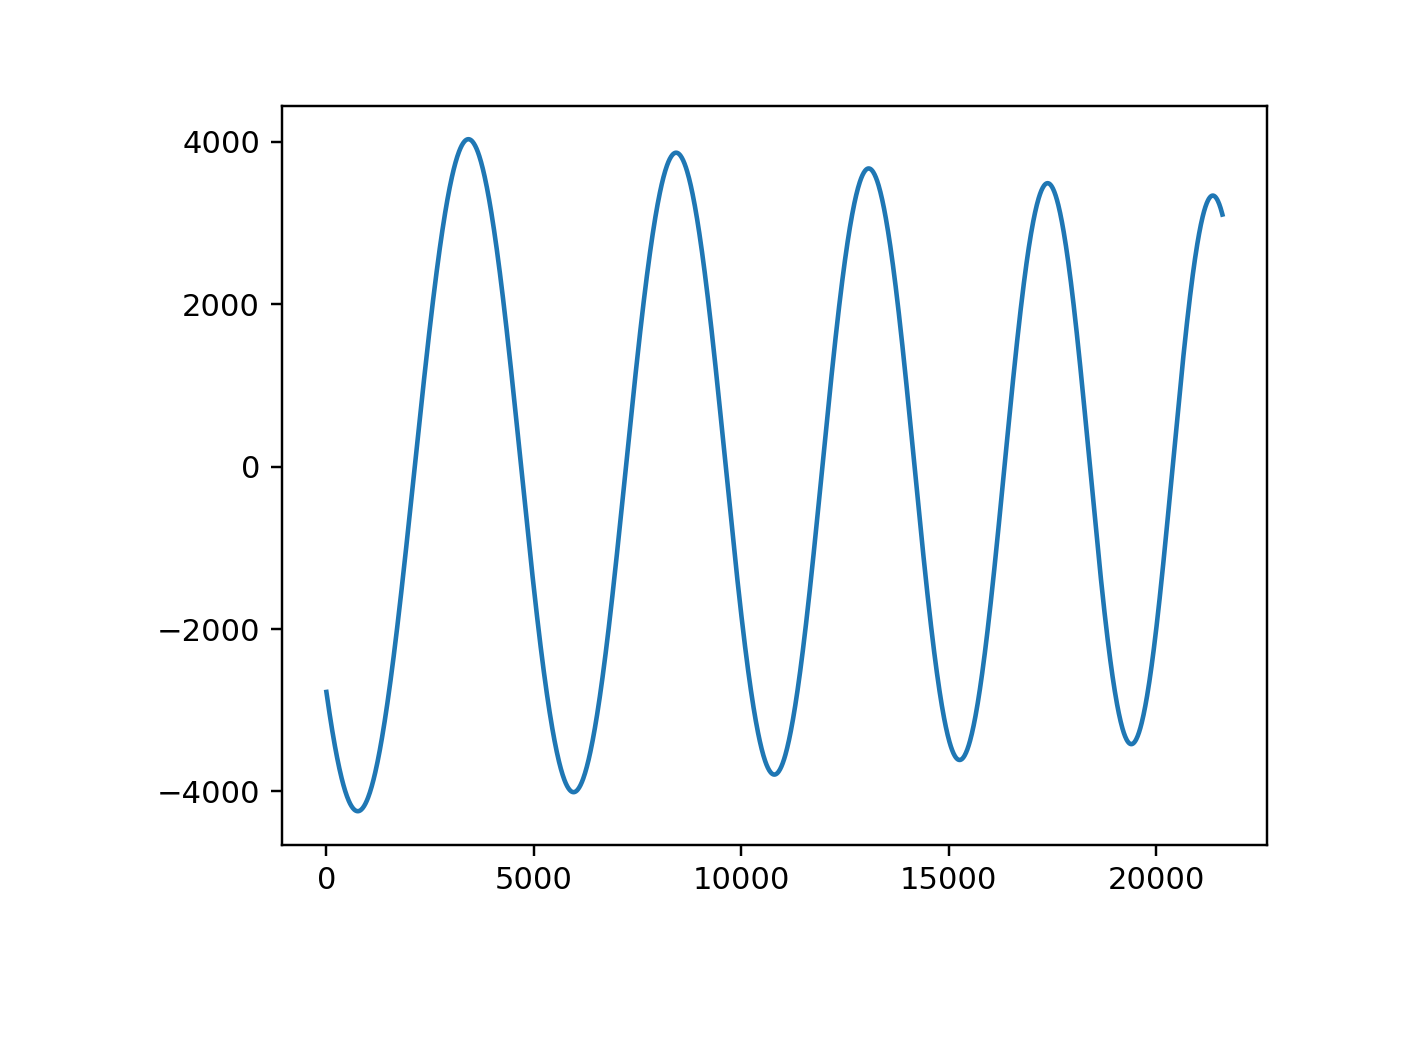

<IPython.core.display.Javascript object>


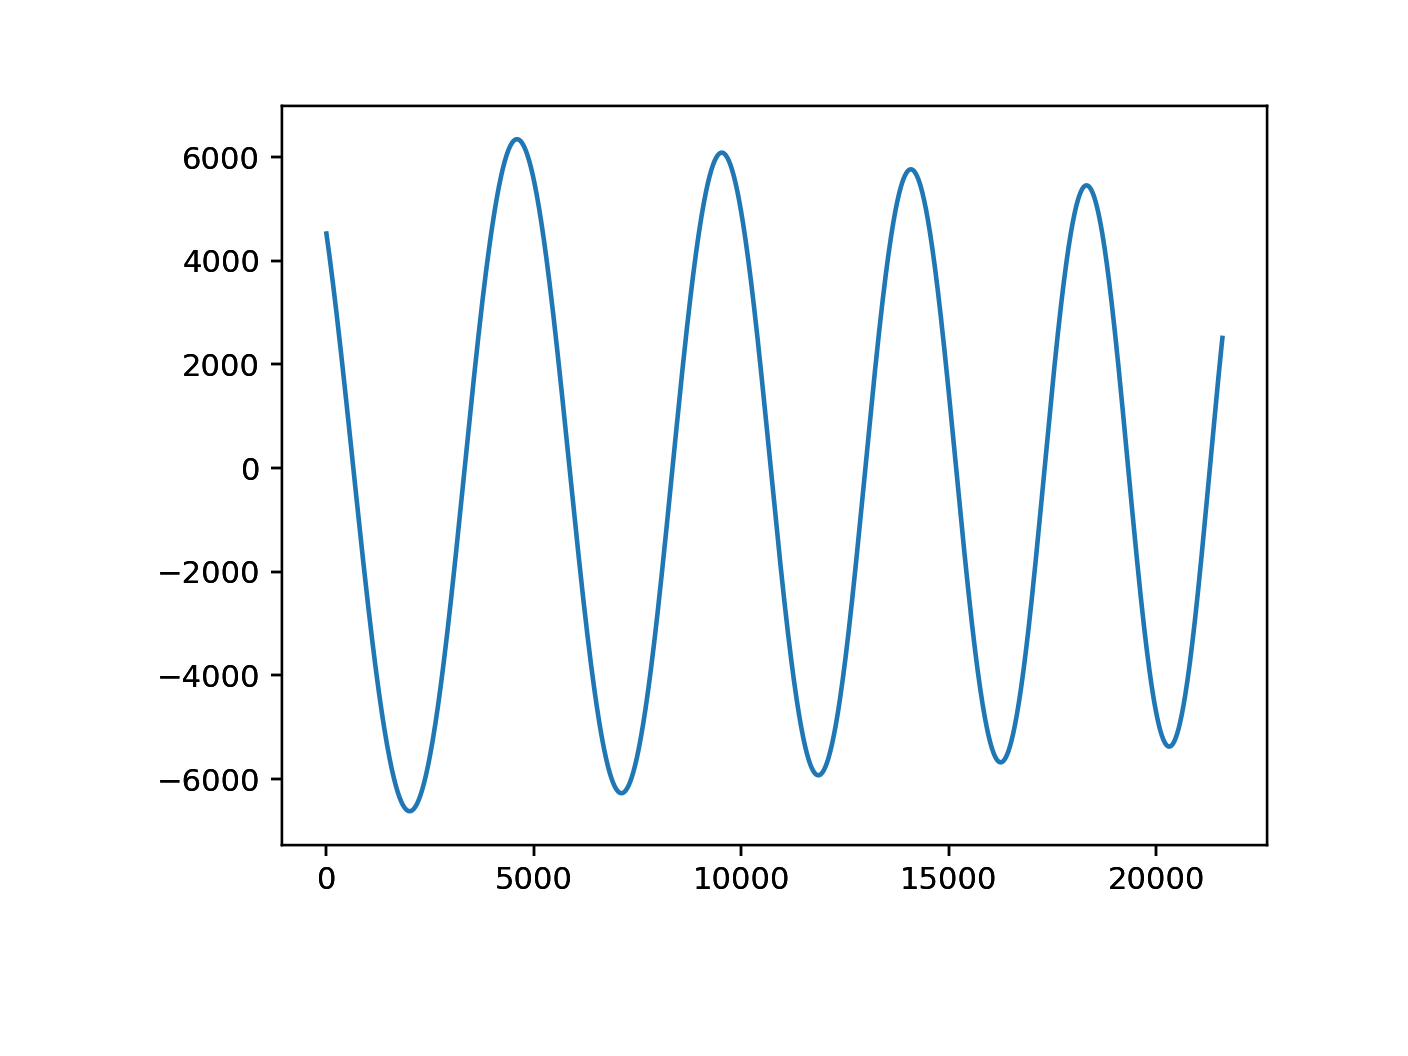

<IPython.core.display.Javascript object>


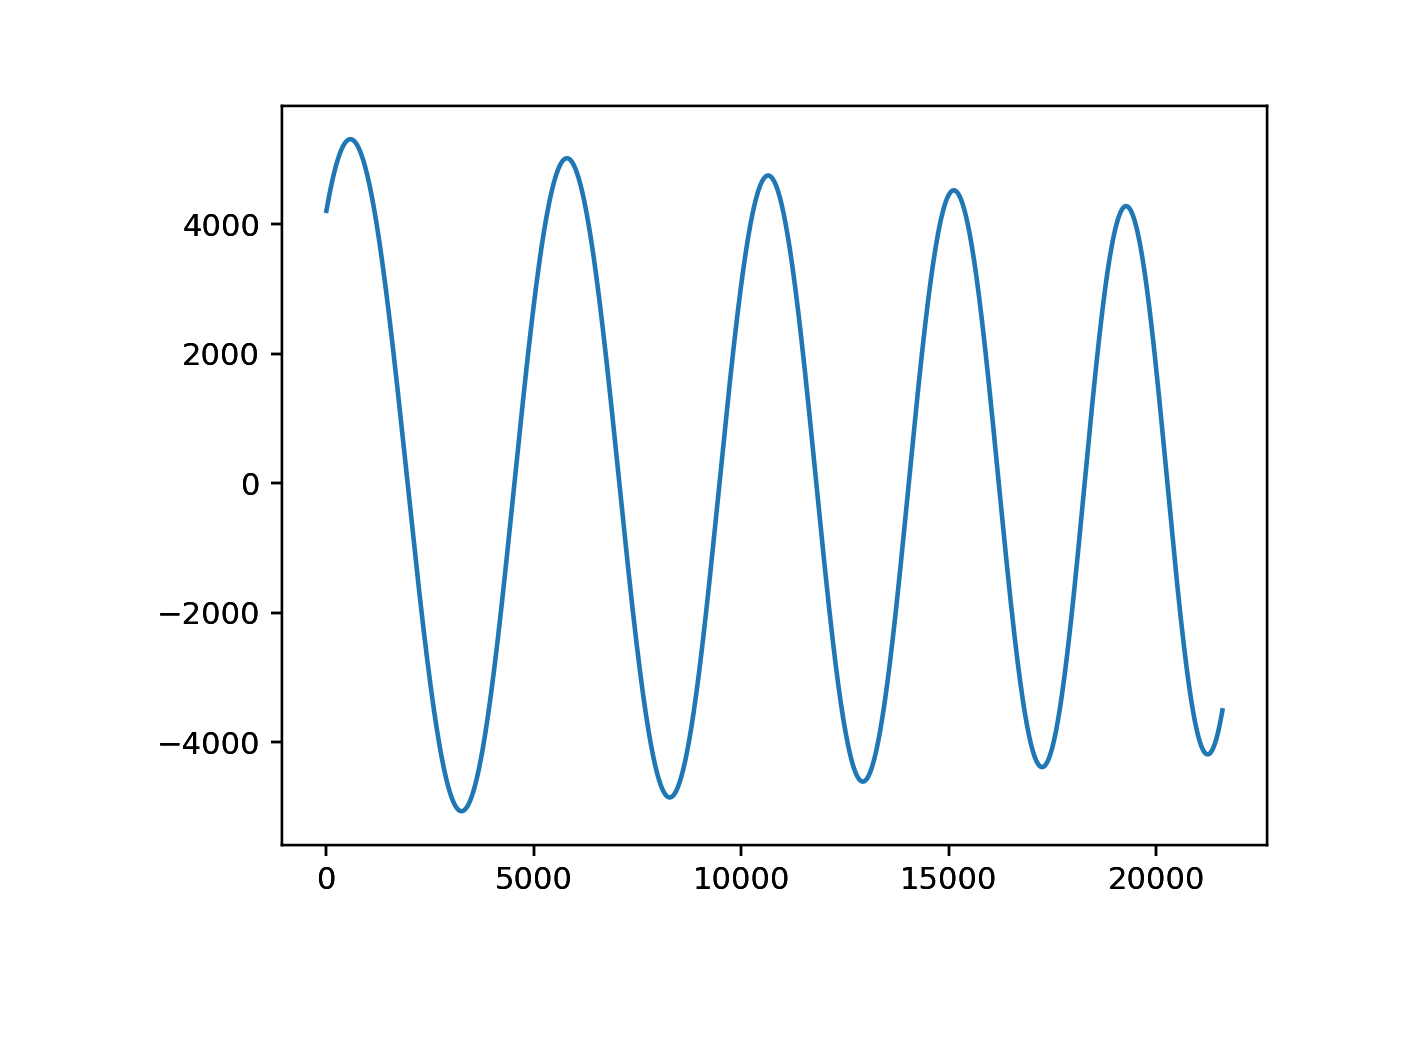

In [5]:
fig = plt.figure("X vs Time ")
ax = fig.add_axes([0.2,0.2,0.7,0.7])
plt.plot(orbits.t, x_values)

fig = plt.figure("Y vs Time ")
ax = fig.add_axes([0.2,0.2,0.7,0.7])
ax.plot(orbits.t, y_values)

fig = plt.figure("Z vs Time ")
ax = fig.add_axes([0.2,0.2,0.7,0.7])
ax.plot(orbits.t, z_values)

<IPython.core.display.Javascript object>


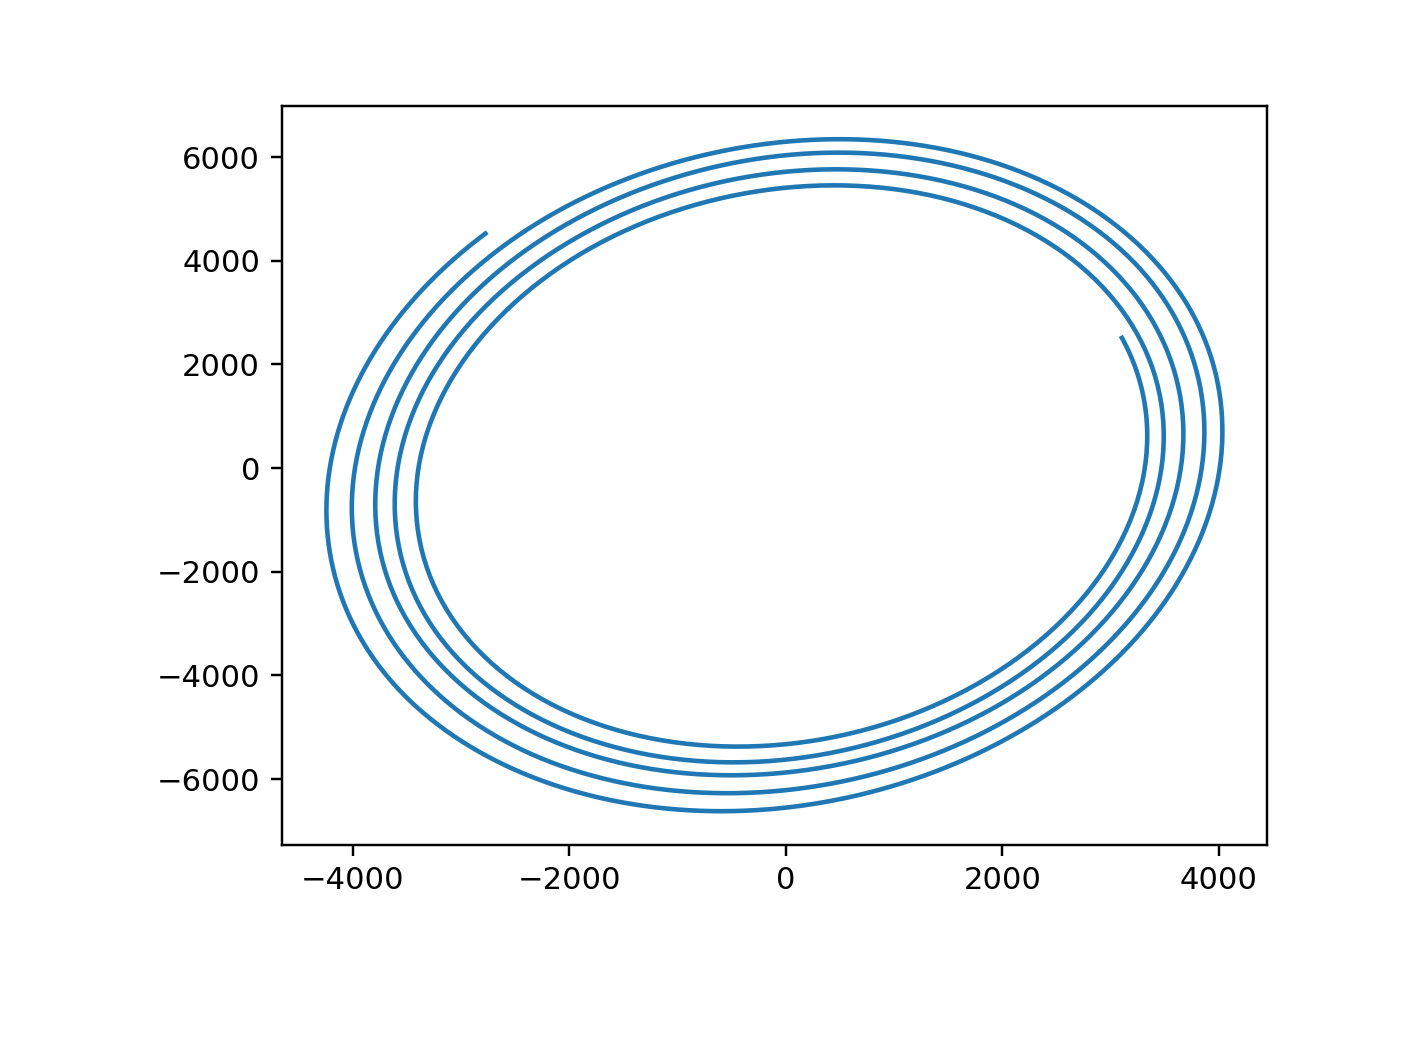

<IPython.core.display.Javascript object>


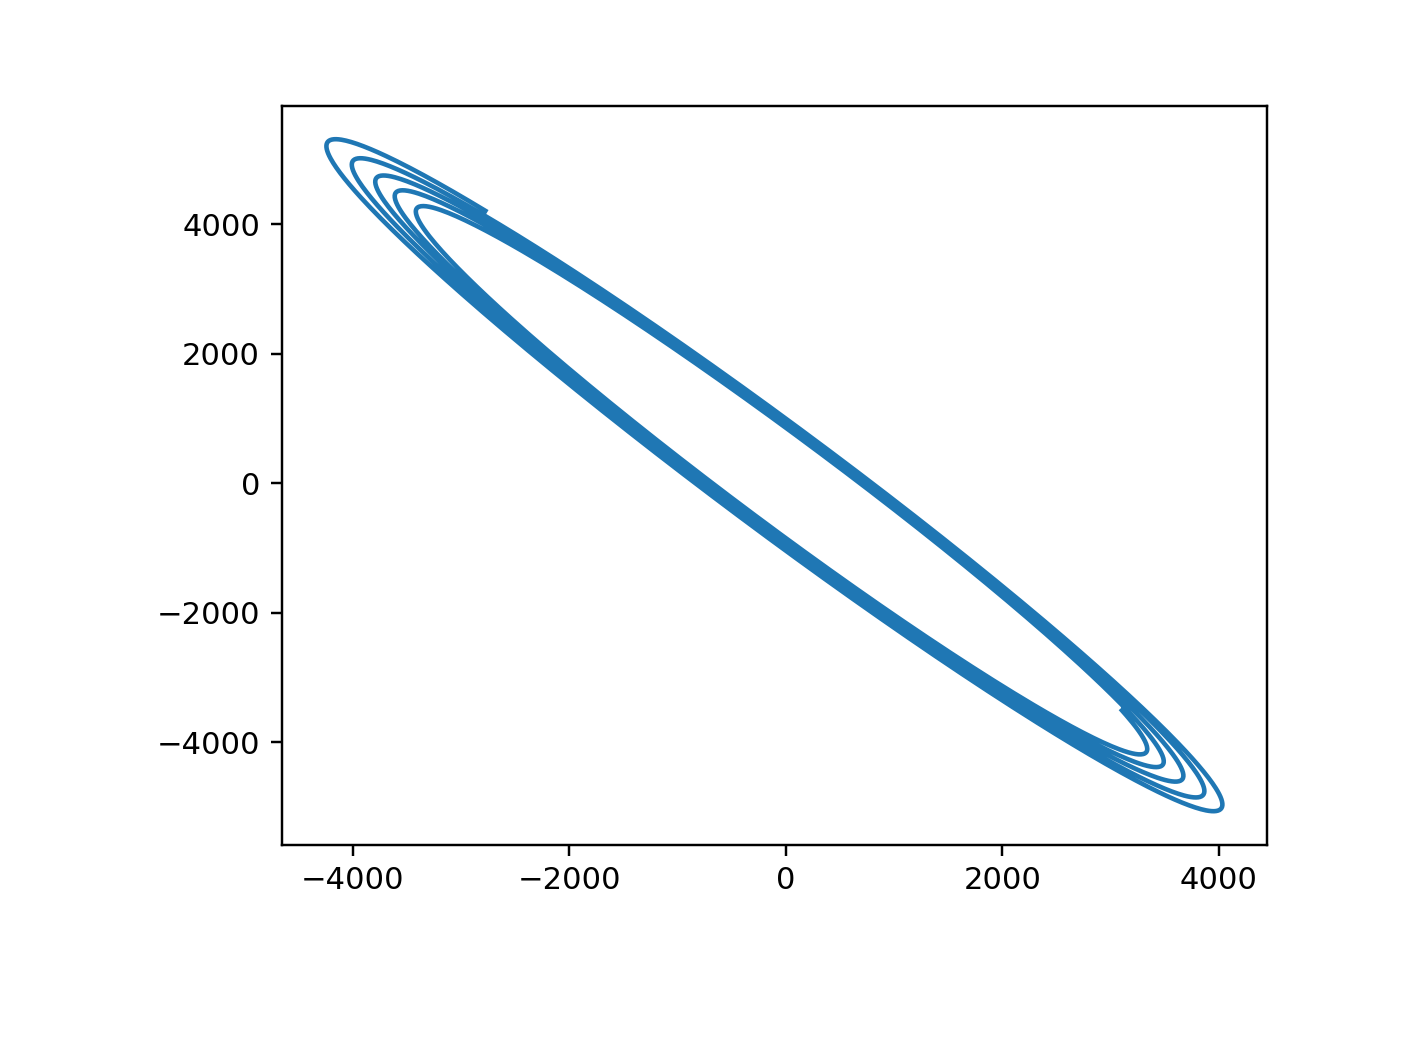

<IPython.core.display.Javascript object>


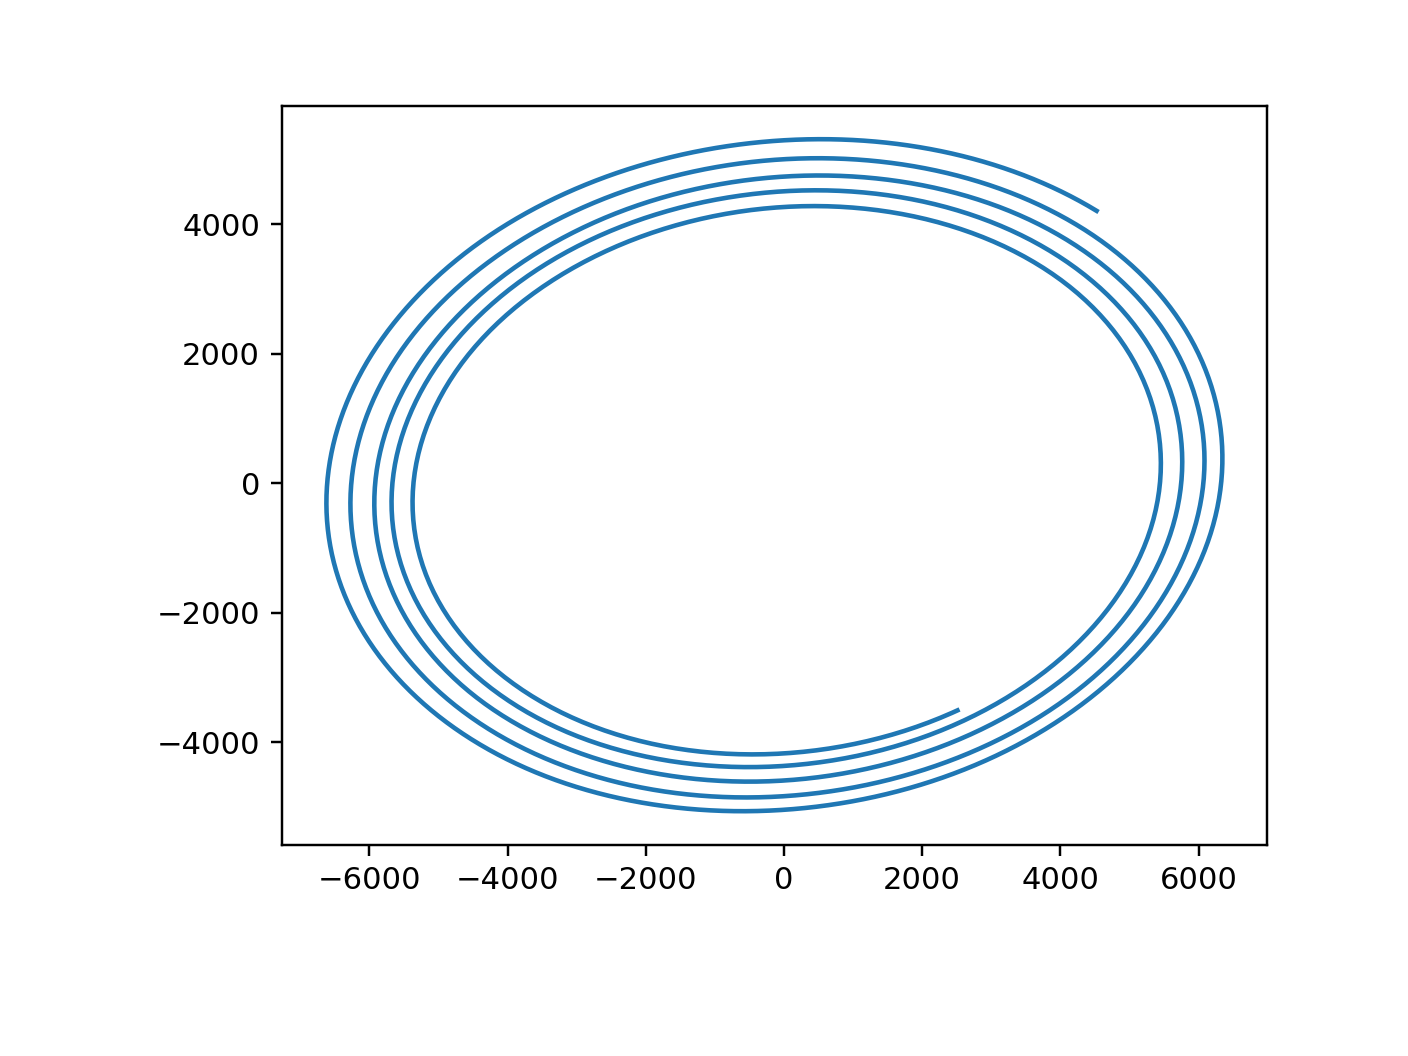

In [8]:
fig = plt.figure("X vs Y ")
ax = fig.add_axes([0.2,0.2,0.7,0.7])
ax.plot(x_values, y_values)

fig = plt.figure("X vs Z ")
ax = fig.add_axes([0.2,0.2,0.7,0.7])
ax.plot(x_values, z_values)


fig = plt.figure("Y vs Z ")
ax = fig.add_axes([0.2,0.2,0.7,0.7])
ax.plot(y_values, z_values)

# 3D Plot

Make a 3D plot showing the 3D trajectory of the ISS


<IPython.core.display.Javascript object>


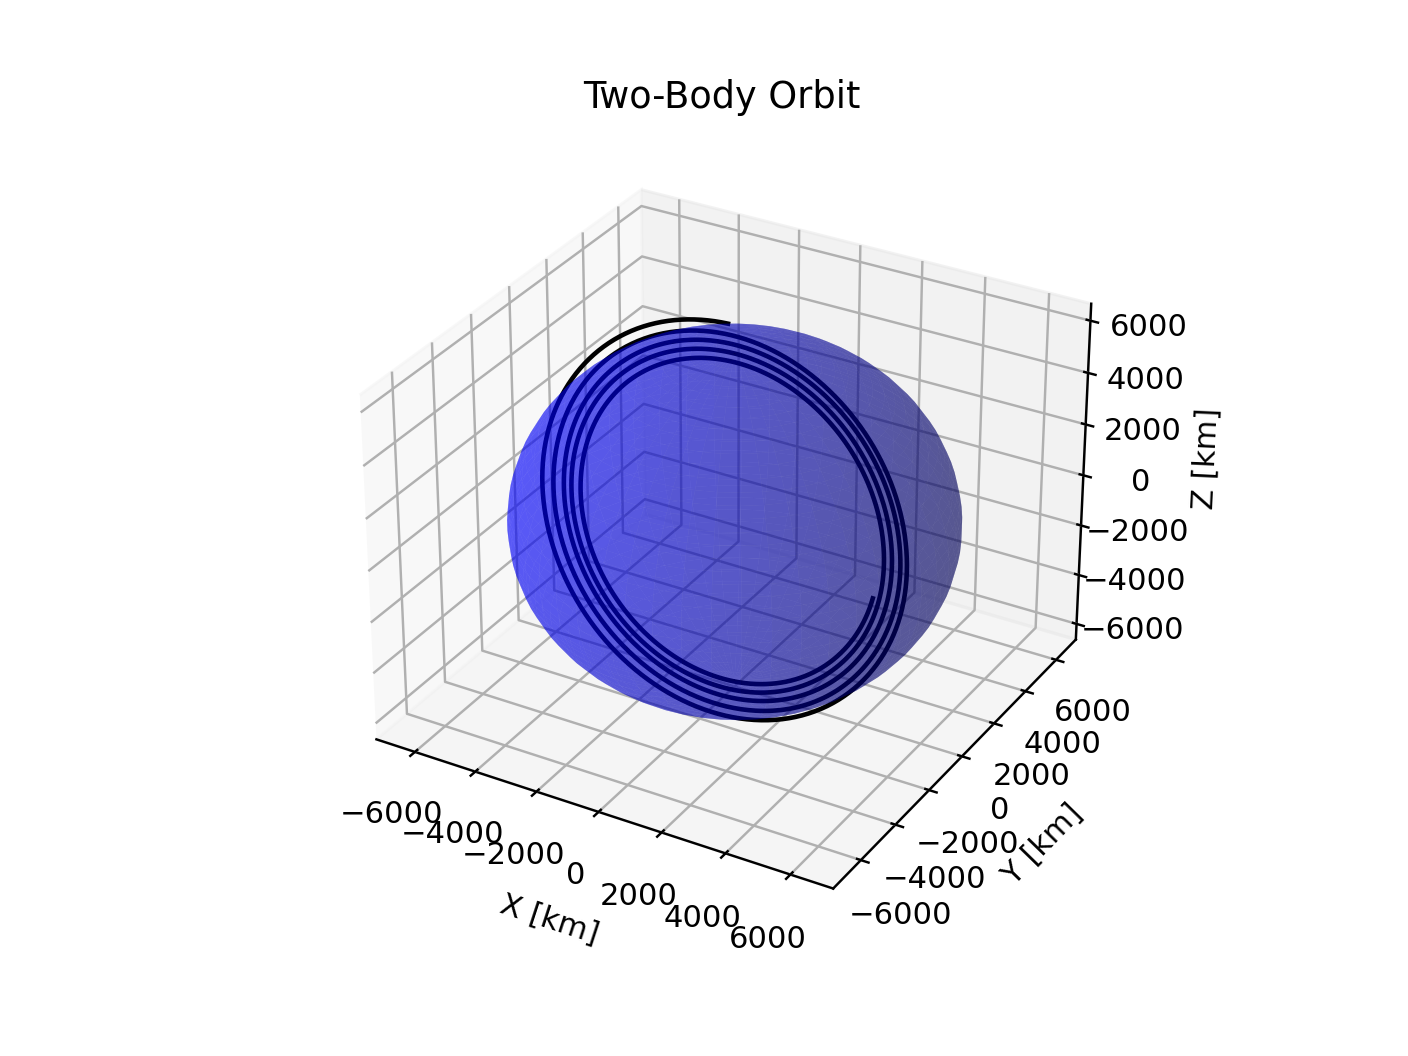

In [9]:
# Setting up Spherical Earth to Plot
N = 50
phi = np.linspace(0, 2 * np.pi, N)
theta = np.linspace(0, np.pi, N)
theta, phi = np.meshgrid(theta, phi)

r_Earth = 6378.14  # Average radius of Earth [km]
X_Earth = r_Earth * np.cos(phi) * np.sin(theta)
Y_Earth = r_Earth * np.sin(phi) * np.sin(theta)
Z_Earth = r_Earth * np.cos(theta)

# Plotting Earth and Orbit
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X_Earth, Y_Earth, Z_Earth, color='blue', alpha=0.4)

#you need to redefine x_sat,y_sat, and z_sat to use your x,y,z solution array names
ax.plot3D(x_values, y_values, z_values, 'black')

#ax.view_init(30, 145)  # Changing viewing angle (adjust as needed)
plt.title('Two-Body Orbit')
ax.set_xlabel('X [km]')
ax.set_ylabel('Y [km]')
ax.set_zlabel('Z [km]');